In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('income.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

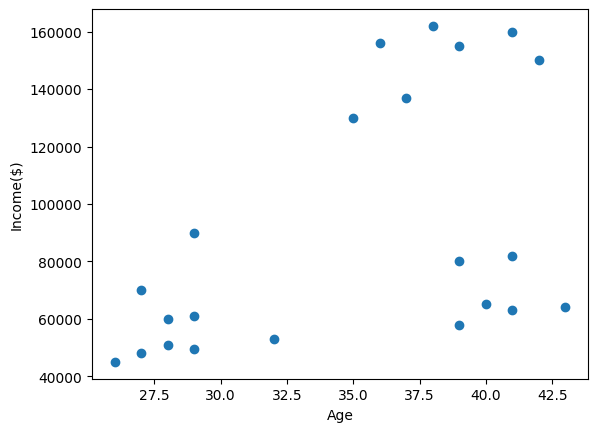

In [3]:
plt.scatter(data.Age,data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [6]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
data['clusters'] = y_predicted
data.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [8]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [9]:
data1 = data[data.clusters==0]
data2 = data[data.clusters==1]
data3 = data[data.clusters==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


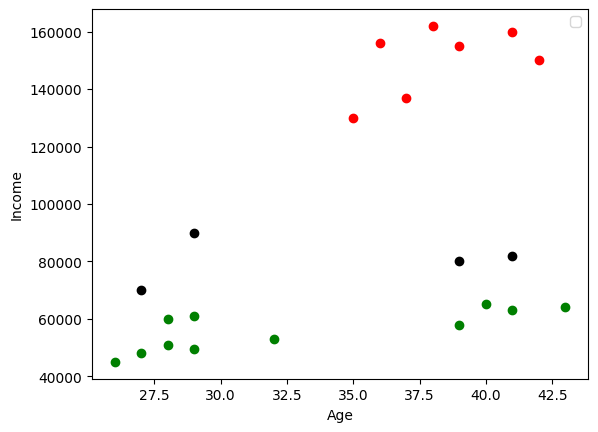

In [13]:
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

yaha black wla sahi nahi lag rha h cluster me uska reason ye hai ki y ka value kafi jada vary kar rha h x ke comparison me 
ab usko manage karne kiley MinMaxScaler ka use karenge age aur income pe jisme dono ka value 0 se 1 ke bich me laakr rakh dega

In [15]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])
scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])
data.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [24]:
y_predicted1 = km.fit_predict(data[['Age','Income($)']])
y_predicted1

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [25]:
data['cluster1'] = y_predicted1

In [26]:
data.head()

,Name,Age,Income($),clusters,cluster1
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0


In [27]:
data4 = data[data.cluster1==0]
data5 = data[data.cluster1==1]
data6 = data[data.cluster1==2]

Text(0, 0.5, 'Income')

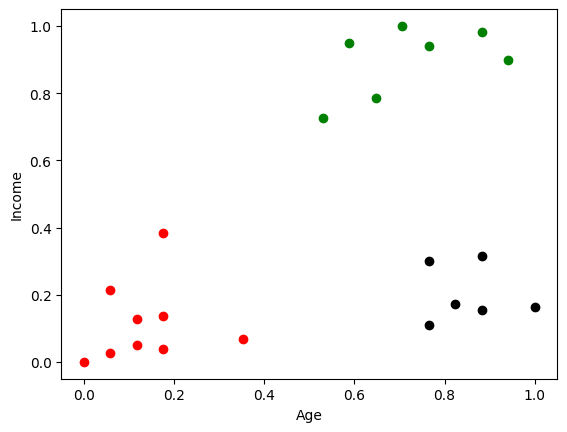

In [28]:
plt.scatter(data4.Age,data4['Income($)'],color='green')
plt.scatter(data5.Age,data5['Income($)'],color='red')
plt.scatter(data6.Age,data6['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income')